In [149]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

In [150]:
data = pd.read_csv("Dataset.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [151]:
#Get country's continent

from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def get_continent(col):
    try:
        cn_a2_code = country_name_to_country_alpha2(col)
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown'
    return cn_continent

# Add the 'Continent' column to the DataFrame
data['Continent'] = data['country'].apply(get_continent)


display(data)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Continent
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,AS
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,EU
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,AF
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,AF
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,NA
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,OC
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,SA
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,AS
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,AS


In [211]:
data_grouped = data.groupby('Continent')

# Dictionary to store DataFrames for each continent
continent_data = {}

# Iterate over the groups and store each group in the dictionary
for name, group in data_grouped:
    continent_data[name] = group.copy()

# Now, continent_data dictionary contains a DataFrame for each continent

display(continent_data['Unknown'])

# There are a few countries in the Unknown Continent, such as: Congo, Cote d'Ivoire, Lao, Macedonia, Micronesia, St. Vincent and the Grenadines, Timor-Leste.
# Let's drop them for now.
continent_data.pop("Unknown", None)

print(continent_data.keys())


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Continent
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,Unknown
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.70,60.4,4.95,2740,Unknown
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.39,56.3,5.27,1220,Unknown
84,Lao,78.9,35.4,4.47,49.3,3980,9.20,63.8,3.15,1140,Unknown
92,"Macedonia, FYR",10.4,39.8,7.09,58.1,11400,2.04,74.0,1.47,4540,Unknown
101,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.80,65.4,3.46,2860,Unknown
141,St. Vincent and the Grenadines,20.7,26.9,4.47,57.1,9920,4.44,71.6,2.07,6230,Unknown
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.50,71.1,6.23,3600,Unknown


dict_keys(['AF', 'AS', 'EU', 'NA', 'OC', 'SA'])


In [212]:
# Let's look at the EU dataframe as an example:
display(continent_data['EU'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Continent
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,EU
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,EU
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,EU
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,EU
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,EU
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,EU
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,EU
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,EU
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,EU
51,Estonia,4.5,75.1,6.03,68.7,22700,1.740,76.0,1.72,14600,EU


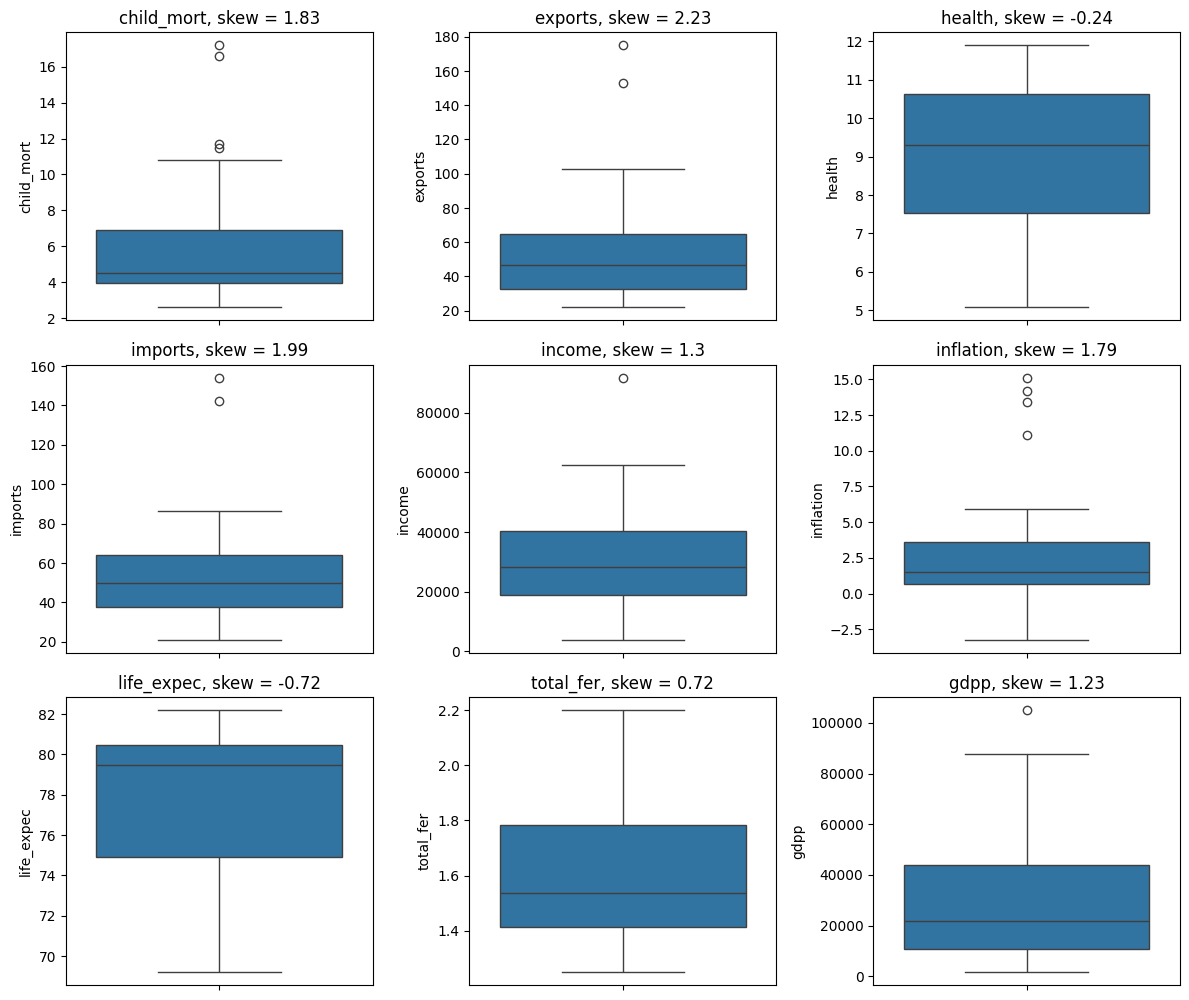

In [229]:
# let's drop the country and continent name and check the distribution for all the data
eu_df = continent_data['EU'].drop(columns=['country', 'Continent'])

# Create subplots
plt.figure(figsize=(12, 30))
plotpos = 0

for column in eu_df.columns[0:]:
    plotpos += 1
    skew = (round(eu_df[column].skew(),2))
    plt.subplot(9, 3, plotpos)
    sns.boxplot(y=eu_df[column])
    plt.title(f"{column}, skew = {skew}")
    plt.tight_layout()

plt.show()


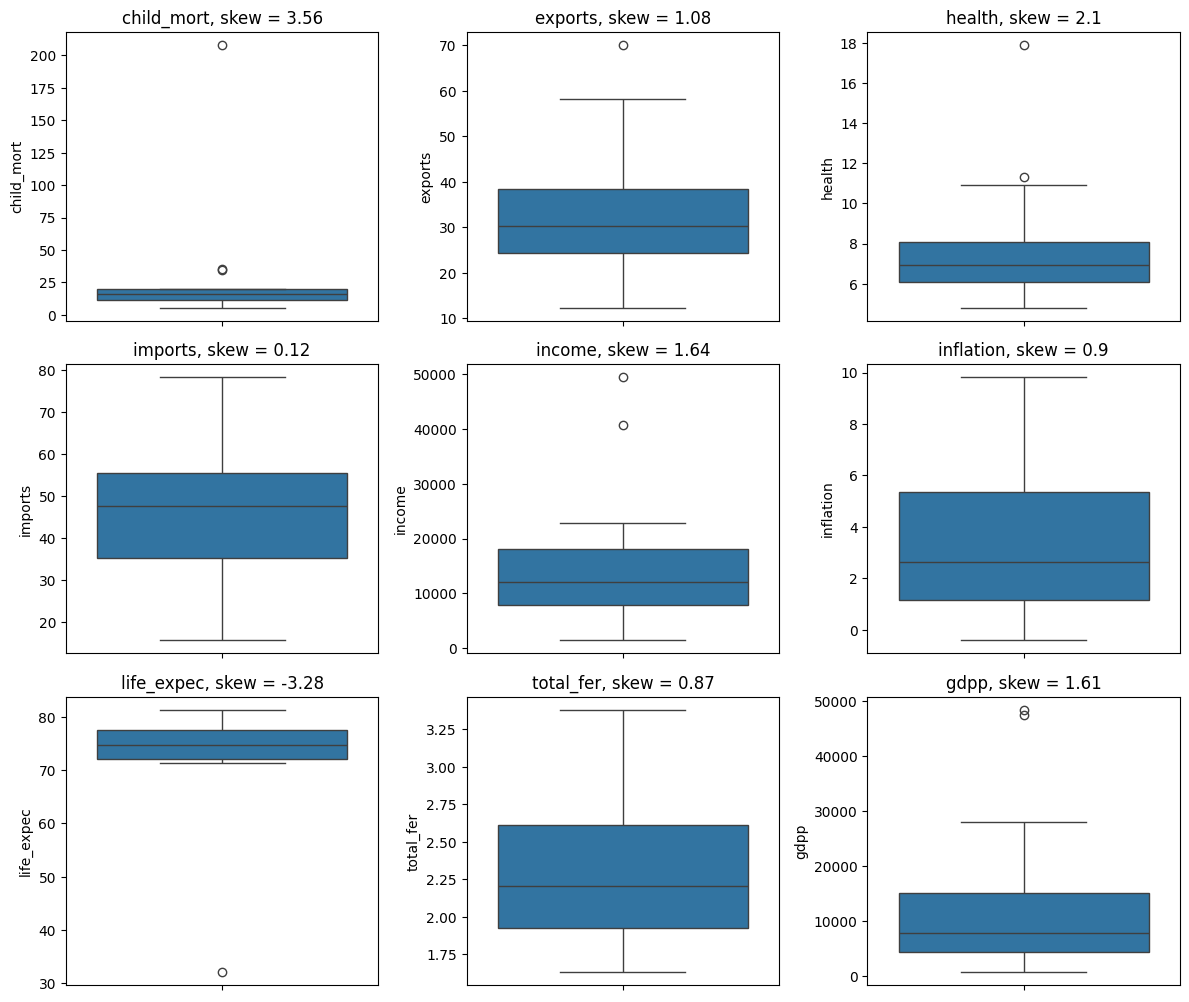

In [239]:
# let's drop the country and continent name and check the distribution for all the data
na_df = continent_data['NA'].drop(columns=['country', 'Continent'])

# Create subplots
plt.figure(figsize=(12, 30))
plotpos = 0

for column in na_df.columns[0:]:
    plotpos += 1
    skew = (round(na_df[column].skew(),2))
    plt.subplot(9, 3, plotpos)
    sns.boxplot(y=na_df[column])
    plt.title(f"{column}, skew = {skew}")
    plt.tight_layout()

plt.show()


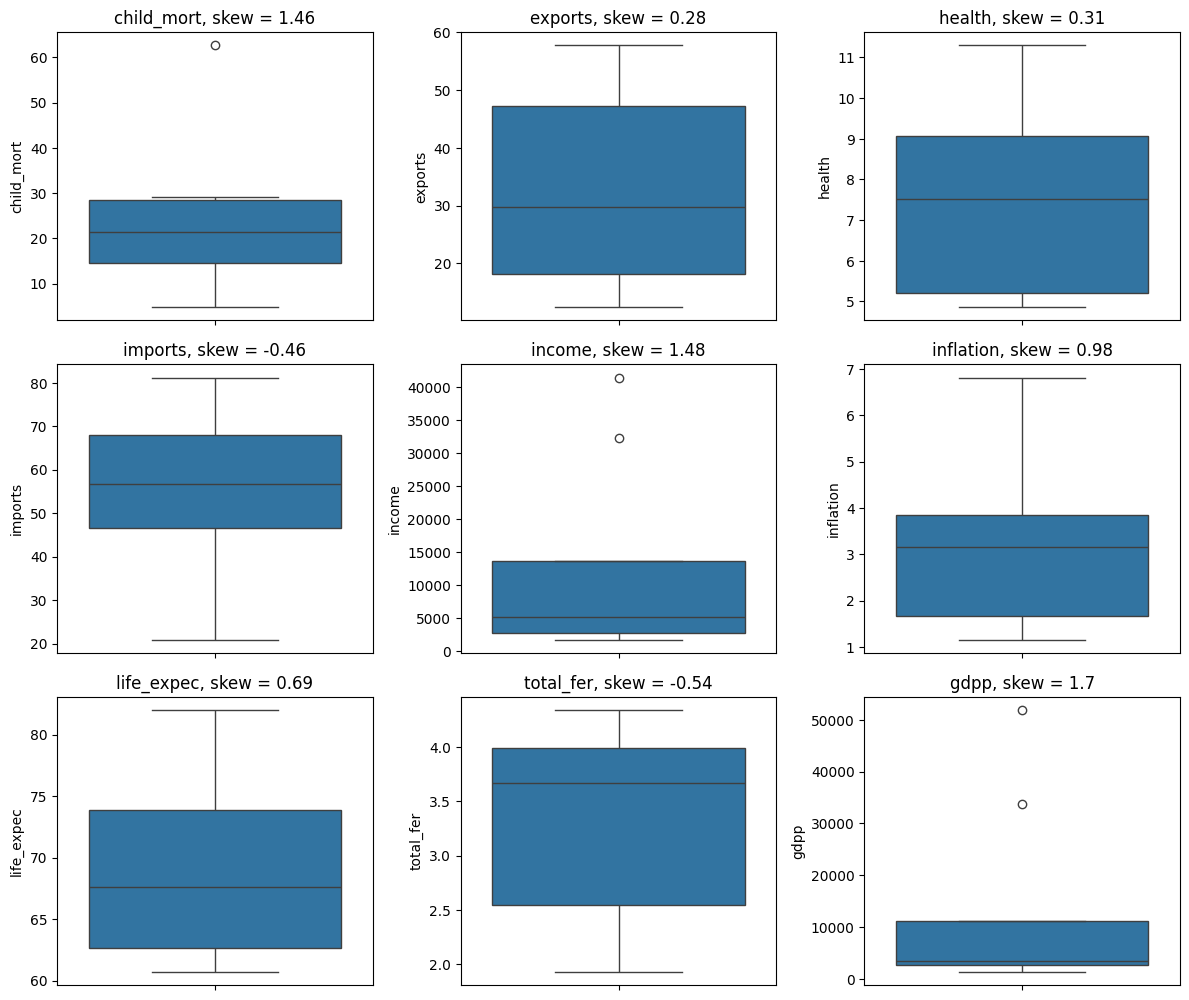

In [240]:
# let's drop the country and continent name and check the distribution for all the data
oc_df = continent_data['OC'].drop(columns=['country', 'Continent'])

# Create subplots
plt.figure(figsize=(12, 30))
plotpos = 0

for column in oc_df.columns[0:]:
    plotpos += 1
    skew = (round(oc_df[column].skew(),2))
    plt.subplot(9, 3, plotpos)
    sns.boxplot(y=oc_df[column])
    plt.title(f"{column}, skew = {skew}")
    plt.tight_layout()

plt.show()


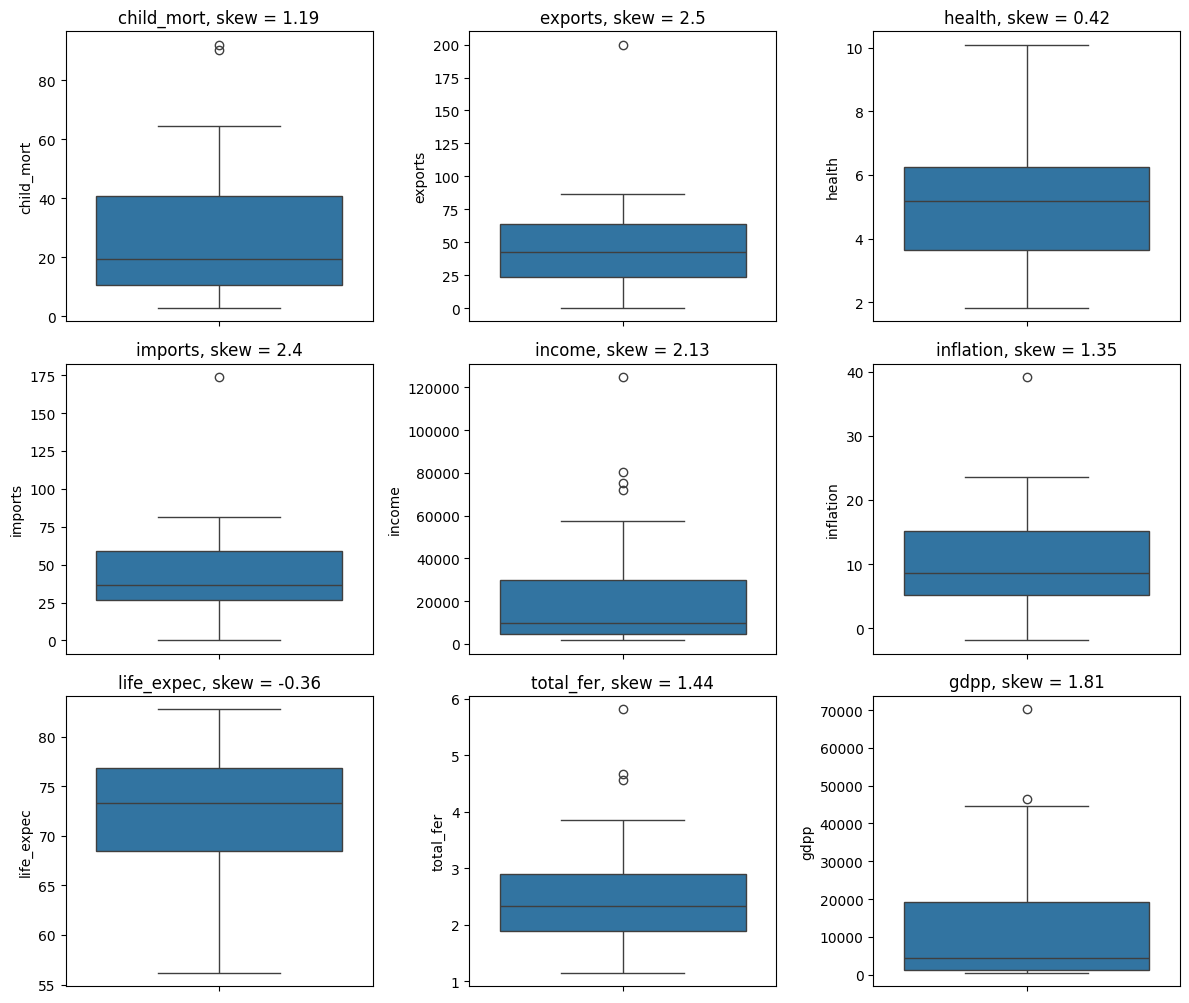

In [241]:
# let's drop the country and continent name and check the distribution for all the data
as_df = continent_data['AS'].drop(columns=['country', 'Continent'])

# Create subplots
plt.figure(figsize=(12, 30))
plotpos = 0

for column in as_df.columns[0:]:
    plotpos += 1
    skew = (round(as_df[column].skew(),2))
    plt.subplot(9, 3, plotpos)
    sns.boxplot(y=as_df[column])
    plt.title(f"{column}, skew = {skew}")
    plt.tight_layout()

plt.show()


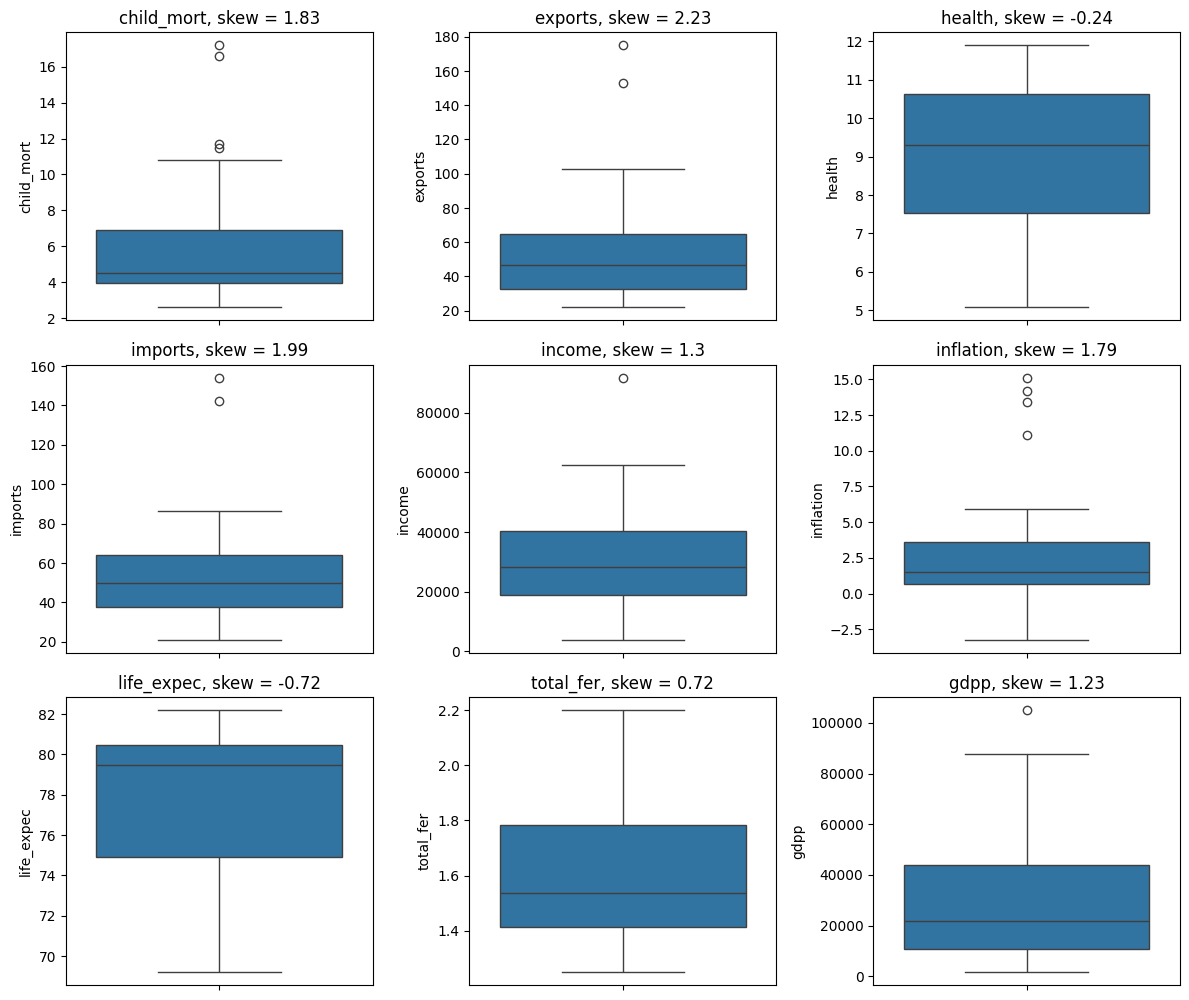

In [242]:
# let's drop the country and continent name and check the distribution for all the data
af_df = continent_data['AF'].drop(columns=['country', 'Continent'])

# Create subplots
plt.figure(figsize=(12, 30))
plotpos = 0

for column in eu_df.columns[0:]:
    plotpos += 1
    skew = (round(eu_df[column].skew(),2))
    plt.subplot(9, 3, plotpos)
    sns.boxplot(y=eu_df[column])
    plt.title(f"{column}, skew = {skew}")
    plt.tight_layout()

plt.show()


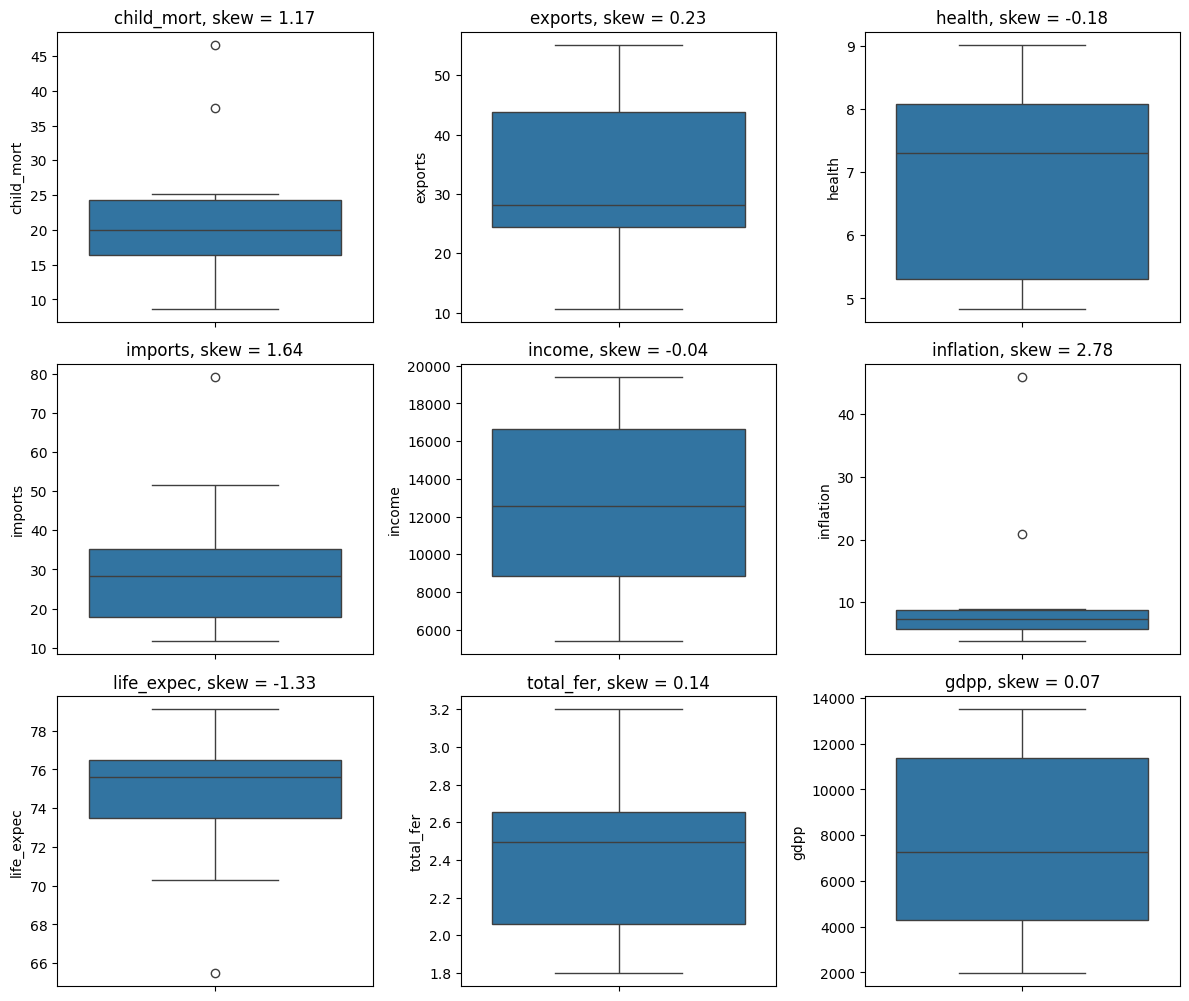

In [243]:
# let's drop the country and continent name and check the distribution for all the data
sa_df = continent_data['SA'].drop(columns=['country', 'Continent'])

# Create subplots
plt.figure(figsize=(12, 30))
plotpos = 0

for column in sa_df.columns[0:]:
    plotpos += 1
    skew = (round(sa_df[column].skew(),2))
    plt.subplot(9, 3, plotpos)
    sns.boxplot(y=sa_df[column])
    plt.title(f"{column}, skew = {skew}")
    plt.tight_layout()

plt.show()


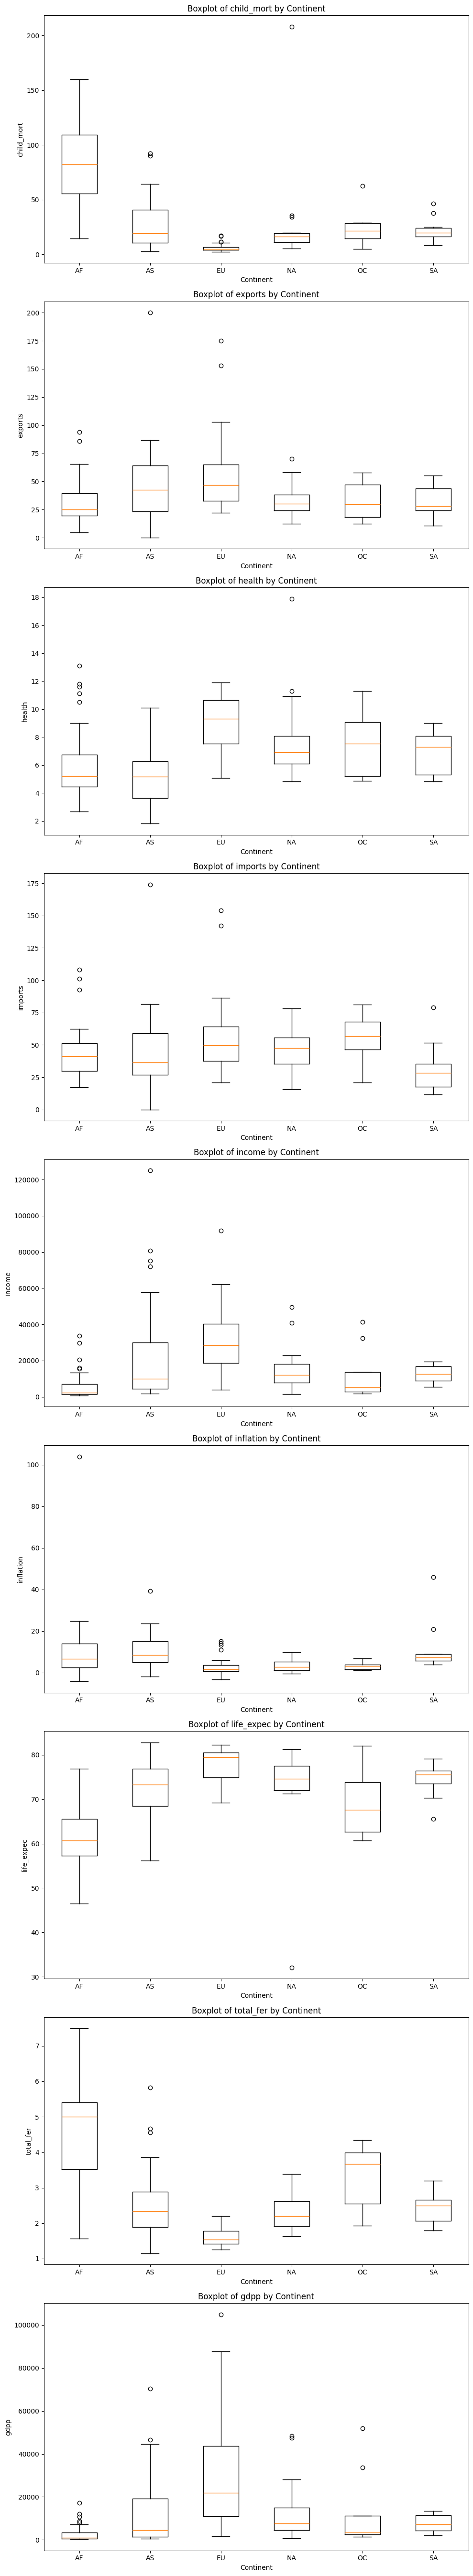

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each column
columns_to_plot = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
num_cols = len(columns_to_plot)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, num_cols*6))

# Iterate over the columns
for i, column in enumerate(columns_to_plot):
    # Create a subplot for the column
    ax = axes[i]
    
    # Create a list to store the data for each continent
    data_by_continent = [df[column] for df in continent_data.values()]
    
    ax.boxplot(data_by_continent, labels=continent_data.keys())
    
    ax.set_xlabel("Continent")
    ax.set_ylabel(column)
    ax.set_title(f"Boxplot of {column} by Continent")

plt.tight_layout()
plt.show()

